In [6]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"ogsample.csv")

# Initialize SentimentIntensityAnalyzer and lists to store positive/negative words
sia = SentimentIntensityAnalyzer()
male_positive_words = []
male_negative_words = []
female_positive_words = []
female_negative_words = []

# Iterate through rows of the DataFrame
for index, row in data.iterrows():
    if row['Gender'] == 'Male':
        for word in row['Content'].split(' '):
            if (sia.polarity_scores(word)['compound']) >= 0.5:
                male_positive_words.append(word)
            elif (sia.polarity_scores(word)['compound']) <= -0.5:
                male_negative_words.append(word)
    elif row['Gender'] == 'Female':
        for word in row['Content'].split(' '):
            if (sia.polarity_scores(word)['compound']) >= 0.5:
                female_positive_words.append(word)
            elif (sia.polarity_scores(word)['compound']) <= -0.5:
                female_negative_words.append(word)



In [7]:
print(len(male_positive_words))
print(len(male_negative_words))
print(len(female_positive_words))
print(len(female_negative_words))

4090
4998
1282
1868


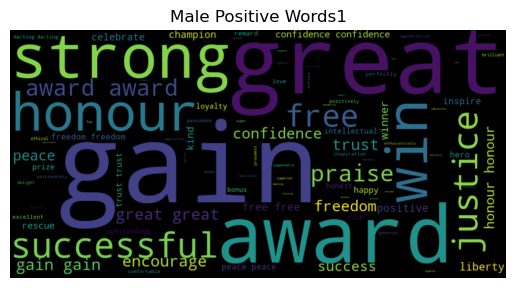

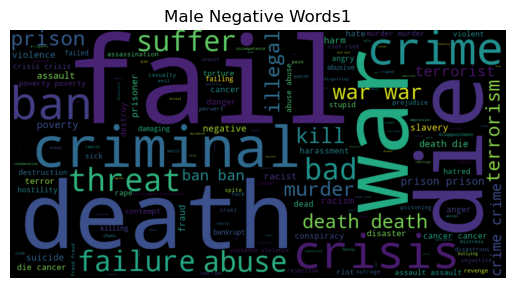

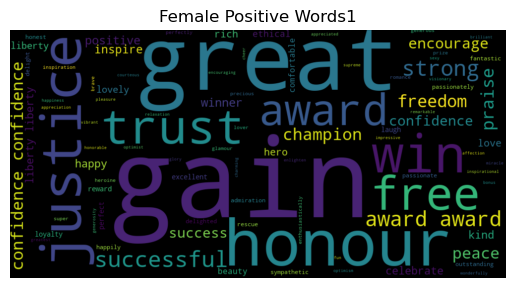

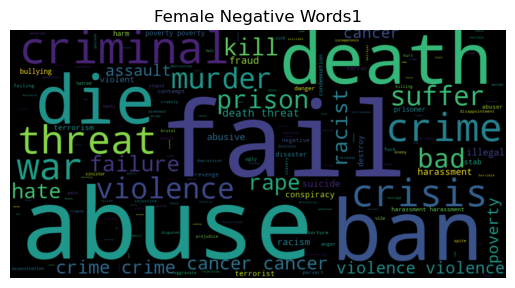

In [8]:
for title, word_list in [('Male Positive Words1', male_positive_words), 
                         ('Male Negative Words1', male_negative_words), 
                         ('Female Positive Words1', female_positive_words), 
                         ('Female Negative Words1', female_negative_words)]:
    wordcloud = WordCloud(width=1000, height=500).generate(' '.join(word_list))
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

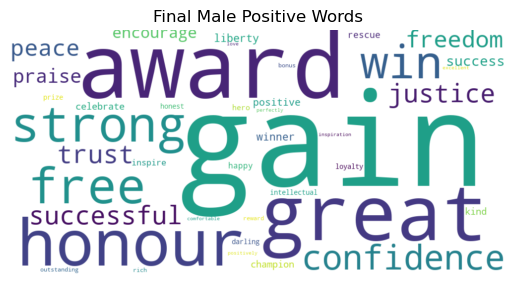

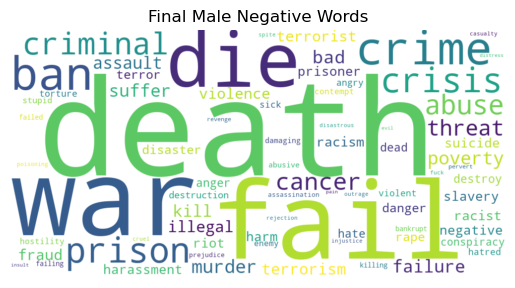

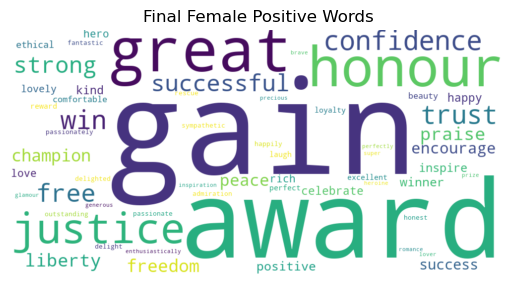

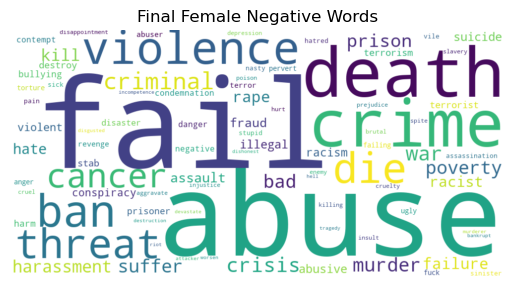

In [19]:
from collections import Counter

# Use Python's `Counter` to get the most common words
# And select the top 100 of each category
male_pos_word_freq = Counter(male_positive_words).most_common(100)
male_neg_word_freq = Counter(male_negative_words).most_common(100)
female_pos_word_freq = Counter(female_positive_words).most_common(100)
female_neg_word_freq = Counter(female_negative_words).most_common(100)

# Create the word clouds
for title, word_freq in [('Final Male Positive Words', male_pos_word_freq), 
                         ('Final Male Negative Words', male_neg_word_freq), 
                         ('Final Female Positive Words', female_pos_word_freq), 
                         ('Final Female Negative Words', female_neg_word_freq)]:
#     wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(word_freq))
     # Add prefer_horizontal=1.0 to ensure words are only placed horizontally
    wordcloud = WordCloud(width=1000, height=500, prefer_horizontal=1.0, min_font_size=10, background_color='white', collocations=True).generate_from_frequencies(dict(word_freq))

    # Display the cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()
    
    # Save to PNG
    wordcloud.to_file(title + '.png')

In [10]:
print(male_pos_word_freq)

[('gain', 423), ('award', 414), ('great', 406), ('honour', 295), ('strong', 202), ('free', 198), ('win', 172), ('confidence', 146), ('successful', 146), ('trust', 145), ('justice', 143), ('freedom', 133), ('peace', 129), ('praise', 112), ('encourage', 98), ('success', 71), ('liberty', 42), ('winner', 40), ('positive', 38), ('celebrate', 36), ('champion', 36), ('kind', 36), ('rescue', 34), ('inspire', 30), ('happy', 28), ('hero', 26), ('honest', 23), ('darling', 23), ('prize', 22), ('loyalty', 21), ('intellectual', 21), ('outstanding', 16), ('rich', 16), ('reward', 16), ('bonus', 16), ('excellent', 12), ('perfectly', 12), ('love', 11), ('positively', 10), ('inspiration', 10), ('comfortable', 9), ('brilliant', 8), ('passionate', 8), ('ethical', 8), ('delight', 7), ('passionately', 7), ('appreciation', 7), ('proudest', 7), ('generous', 7), ('sympathetic', 6), ('superior', 6), ('enthusiastically', 6), ('brave', 6), ('super', 6), ('fun', 6), ('admiration', 5), ('precious', 5), ('glory', 5),

In [11]:
print(female_pos_word_freq)

[('gain', 167), ('award', 131), ('great', 111), ('honour', 92), ('justice', 69), ('confidence', 64), ('win', 60), ('trust', 60), ('free', 55), ('successful', 48), ('strong', 46), ('praise', 27), ('liberty', 27), ('freedom', 26), ('champion', 24), ('peace', 22), ('encourage', 19), ('success', 16), ('positive', 12), ('winner', 12), ('inspire', 11), ('celebrate', 10), ('kind', 10), ('happy', 10), ('hero', 8), ('rich', 8), ('love', 8), ('lovely', 7), ('ethical', 6), ('beauty', 5), ('comfortable', 5), ('loyalty', 4), ('laugh', 4), ('excellent', 4), ('perfect', 4), ('reward', 4), ('admiration', 3), ('outstanding', 3), ('delighted', 3), ('honest', 3), ('delight', 3), ('fantastic', 3), ('passionate', 3), ('happily', 3), ('rescue', 3), ('passionately', 3), ('sympathetic', 3), ('perfectly', 2), ('prize', 2), ('glamour', 2), ('heroine', 2), ('generous', 2), ('enthusiastically', 2), ('romance', 2), ('lover', 2), ('brave', 2), ('super', 2), ('inspiration', 2), ('precious', 2), ('appreciation', 1), 

In [12]:
print(male_neg_word_freq)

[('death', 360), ('fail', 343), ('war', 341), ('die', 256), ('crime', 238), ('ban', 238), ('prison', 178), ('crisis', 174), ('criminal', 132), ('abuse', 120), ('cancer', 110), ('threat', 104), ('poverty', 99), ('murder', 98), ('bad', 91), ('failure', 84), ('suffer', 83), ('assault', 77), ('kill', 72), ('illegal', 68), ('terrorism', 63), ('terrorist', 60), ('violence', 59), ('fraud', 59), ('racism', 47), ('racist', 46), ('riot', 43), ('harassment', 42), ('prisoner', 41), ('negative', 41), ('harm', 40), ('slavery', 40), ('suicide', 39), ('rape', 35), ('terror', 34), ('disaster', 33), ('danger', 32), ('destroy', 27), ('hate', 26), ('dead', 26), ('anger', 26), ('conspiracy', 26), ('destruction', 22), ('angry', 20), ('violent', 19), ('sick', 18), ('torture', 17), ('hatred', 17), ('stupid', 16), ('hostility', 15), ('enemy', 15), ('contempt', 15), ('damaging', 14), ('abusive', 14), ('bankrupt', 13), ('killing', 13), ('failing', 13), ('failed', 13), ('assassination', 12), ('prejudice', 12), ('

In [13]:
print(female_neg_word_freq )

[('fail', 129), ('abuse', 114), ('death', 100), ('crime', 99), ('violence', 85), ('ban', 82), ('die', 73), ('threat', 69), ('cancer', 67), ('criminal', 66), ('crisis', 50), ('war', 49), ('murder', 42), ('poverty', 39), ('suffer', 38), ('bad', 37), ('prison', 35), ('harassment', 31), ('kill', 30), ('rape', 26), ('failure', 26), ('racist', 25), ('hate', 24), ('assault', 20), ('fraud', 17), ('illegal', 16), ('abusive', 16), ('suicide', 16), ('racism', 15), ('violent', 14), ('conspiracy', 13), ('terrorist', 11), ('destroy', 11), ('stab', 11), ('terrorism', 11), ('bullying', 10), ('harm', 10), ('prisoner', 10), ('disaster', 9), ('contempt', 8), ('negative', 8), ('condemnation', 8), ('danger', 8), ('terror', 7), ('revenge', 7), ('abuser', 7), ('anger', 6), ('failing', 6), ('torture', 6), ('ugly', 6), ('fuck', 6), ('pervert', 6), ('stupid', 5), ('hatred', 5), ('vile', 5), ('assassination', 5), ('sinister', 5), ('nasty', 5), ('pain', 5), ('sick', 5), ('cruel', 4), ('brutal', 4), ('insult', 4),